### ¿Para qué sirven las bibliotecas pandas, matplotlib, seaborn?

**pandas:** esta biblioteca sirve para la manipulacion y analisis de datos.

**matplotlib:** esta biblioteca se usa para crear visualizaciones estáticas, animadas e interactivas.

**seaborn:** esta basada en matplotlib que proporciona una interfaz con menos código y mejores prácticas visuales.

A continuacion se crea un ejemplo de graficacion con ayuda de pandas:

In [2]:
# importar las librerias
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns


In [3]:
# creamos un df con datos de muestra
df = pd.DataFrame({
    "etiquetas":['Manzanas', 'Bananas', 'Naranjas', 'Uvas'],
    "cantidad":[30, 35, 26, 33]
    })
df

,etiquetas,cantidad
0,Manzanas,30
1,Bananas,35
2,Naranjas,26
3,Uvas,33


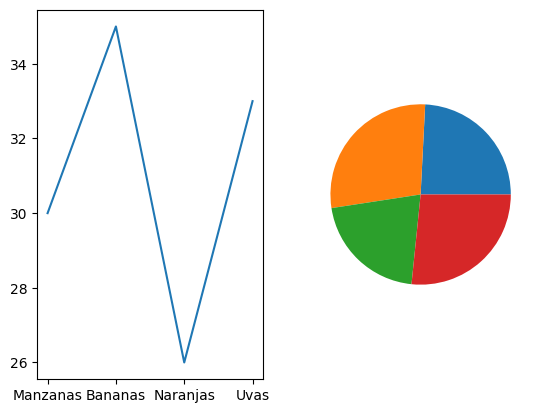

In [4]:
# con matplotlib
fig, axs = plt.subplots(ncols=2, nrows=1)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(df['etiquetas'], df['cantidad'])
ax2.pie(df['cantidad']);

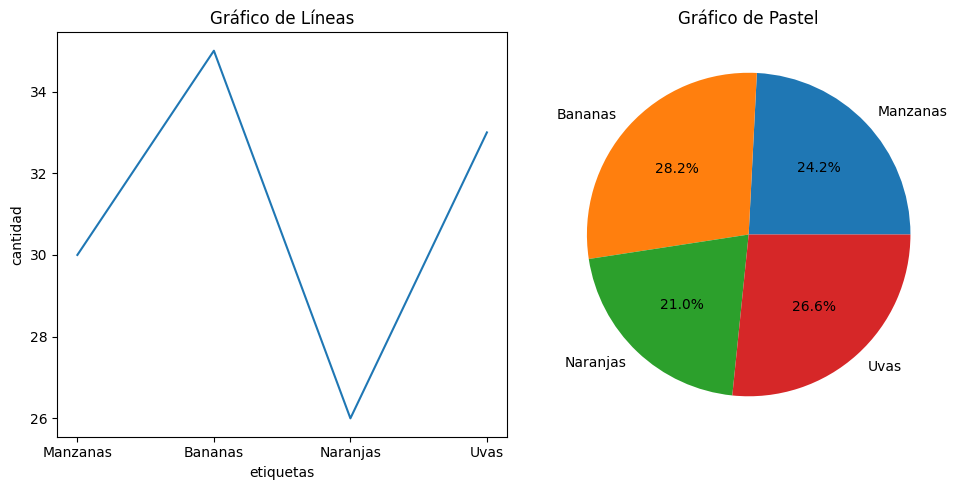

In [5]:
# con seaborn
# Crear la figura y los subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

# Primer gráfico (líneas) usando seaborn
ax1 = axs[0]
sns.lineplot(x='etiquetas', y='cantidad', data=df, ax=ax1)
ax1.set_title('Gráfico de Líneas')

# Segundo gráfico (pastel) usando matplotlib
ax2 = axs[1]
ax2.pie(df['cantidad'], labels=df['etiquetas'], autopct='%1.1f%%')
ax2.set_title('Gráfico de Pastel')

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Carga de los datos

In [6]:
df = pd.read_csv("c:/Users/Hp245-User/Desktop/lab2/heart_disease_uci.csv")
df.sample(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
673,674,59,Male,Switzerland,asymptomatic,135.0,0.0,False,normal,115.0,True,1.0,flat,NaN,reversable defect,1
818,819,43,Male,VA Long Beach,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
908,909,74,Male,VA Long Beach,asymptomatic,155.0,310.0,False,normal,112.0,True,1.5,downsloping,NaN,NaN,2
616,617,46,Male,Switzerland,asymptomatic,115.0,0.0,False,normal,113.0,True,1.5,flat,NaN,reversable defect,1
716,717,70,Male,Switzerland,asymptomatic,140.0,0.0,True,normal,157.0,True,2.0,flat,NaN,reversable defect,3


In [7]:
# num de variables, tipo de dato de cada variable, tamaño del conjunto de datos, estadisticas basicas
print(f"numero de variables: {df.shape[1]}")

# mostramos los tipos de datos de cada variable
print("\ntipos de datos de cada variable:")
print(df.dtypes)

# tamaño del conjunto de datos
print(f"\nTamaño del conjunto de datos (f, c): {df.shape}")

# Estadísticas básicas
print("\nEstadísticas básicas:")
print(df.describe())

numero de variables: 16

tipos de datos de cada variable:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Tamaño del conjunto de datos (f, c): (920, 16)

Estadísticas básicas:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.0000

en este conjunto de datos podemos observar lo siguiente:
- hay 16 columnas diferentes que describen diversas características o mediciones en cada registro
- hay 5 variables numericas que son variables de tipo int64 o float64
- 11 variables categoricas representadas como object
- el df tiene un total de 920 filas y 16 columnas
-  los valores van de un minimo de 0 a un maximo de 4

### 2. Realiza	un	EDA	a	los	datos.

In [8]:
# aqui vamos a hacer un nuevo conjunto de datos para los datos numerico y categoricos

df_numeros = df.copy()
df_categoricos = df.copy()

df_numeros = df_numeros.select_dtypes(include=['int64', 'float64'])
df_categoricos = df_categoricos.select_dtypes(include=['object', 'bool'])

# ahora mostramos el resumen estadistico de las variables

print("Datos numericos\n",df_numeros.describe())
print("\nDatos categoricos\n",df_categoricos.describe())



Datos numericos
                id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000

In [9]:
# aqui vamos a sacar la frecuencia de las categoricas
# obtenemos todas las variables que en este caso son categoricas 
# e imprimimps el nombre y su frecuencia de cada uno
for column in df_categoricos.columns:
    print(f"Frecuencias de la variable {column}:")
    print(df[column].value_counts())
    print("\n")

Frecuencias de la variable sex:
sex
Male      726
Female    194
Name: count, dtype: int64


Frecuencias de la variable dataset:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


Frecuencias de la variable cp:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


Frecuencias de la variable fbs:
fbs
False    692
True     138
Name: count, dtype: int64


Frecuencias de la variable restecg:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


Frecuencias de la variable exang:
exang
False    528
True     337
Name: count, dtype: int64


Frecuencias de la variable slope:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


Frecuencias de la variable thal:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64




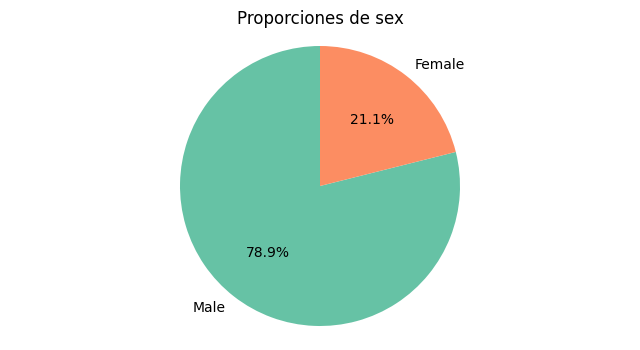

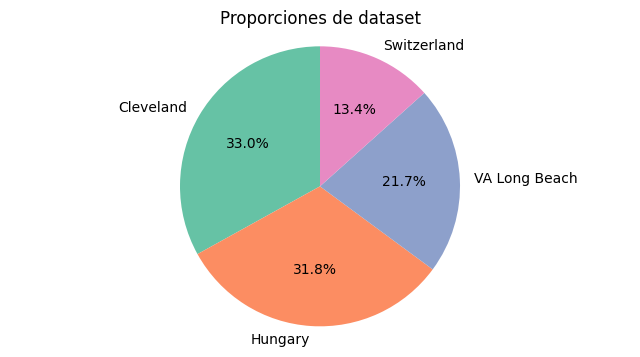

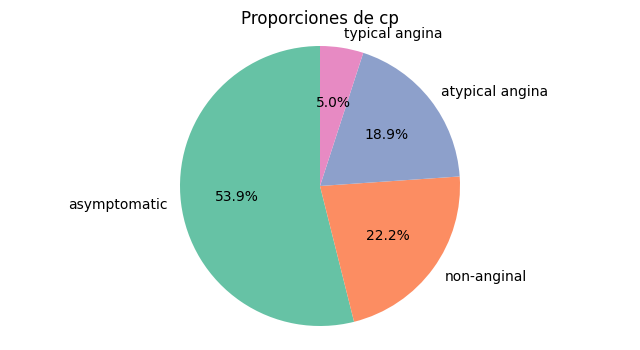

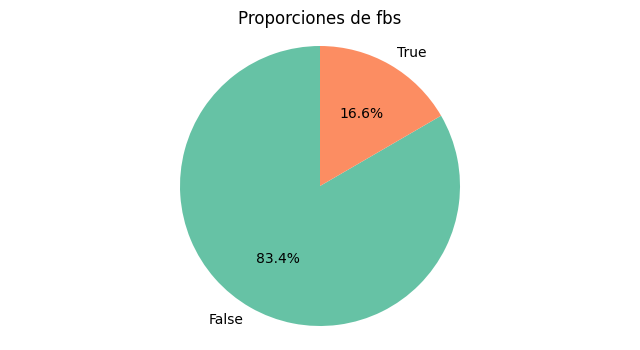

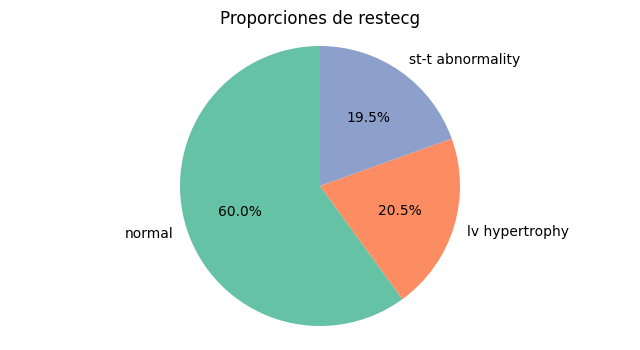

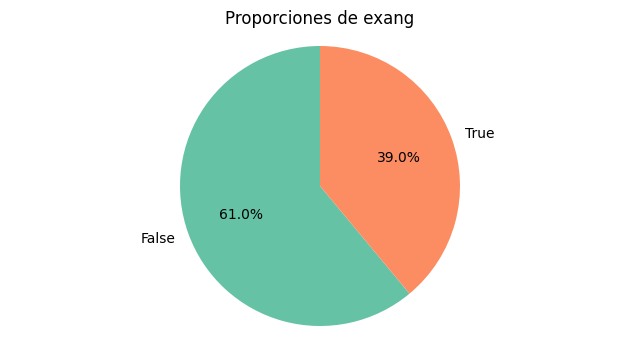

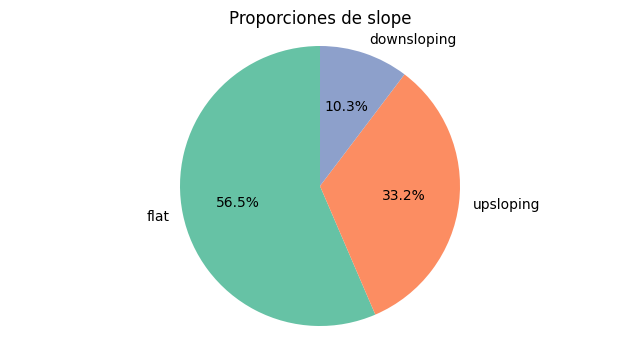

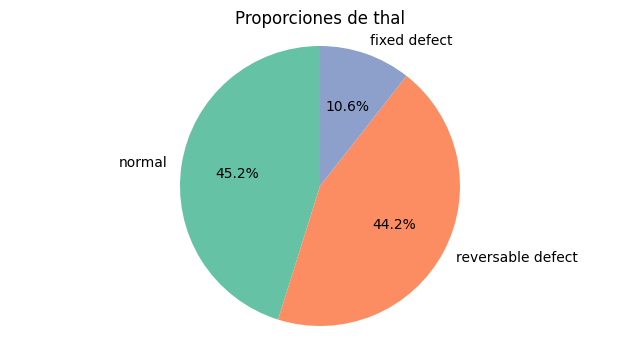

In [10]:
for column in df_categoricos.columns:
    plt.figure(figsize=(8, 4))
    
    # Usar colores de Seaborn para el gráfico de pastel
    colors = sns.color_palette('Set2', len(df[column].value_counts()))
    
    # Crear gráfico de pastel
    plt.pie(df[column].value_counts(), labels=df[column].value_counts().index, 
            autopct='%1.1f%%', startangle=90, colors=colors)
    
    # Título y ajustes
    plt.title(f'Proporciones de {column}')
    plt.axis('equal')
    plt.show()

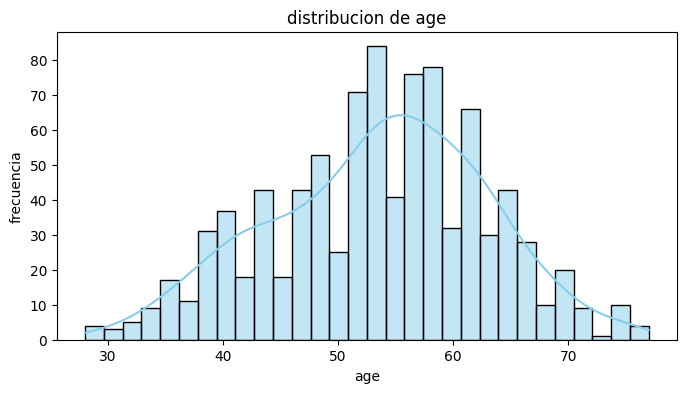

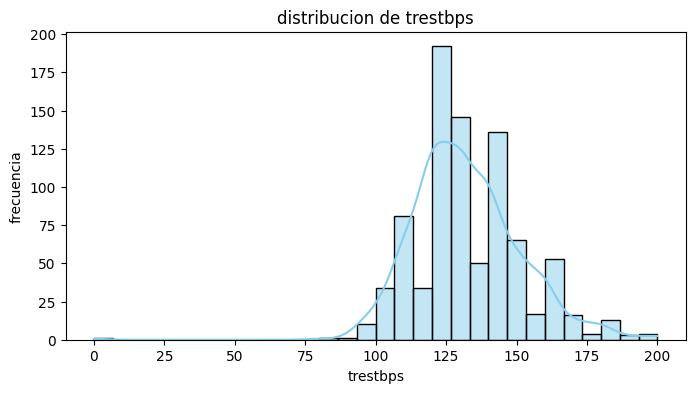

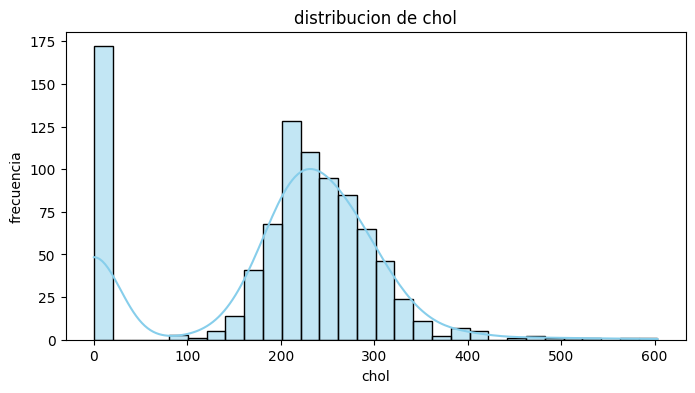

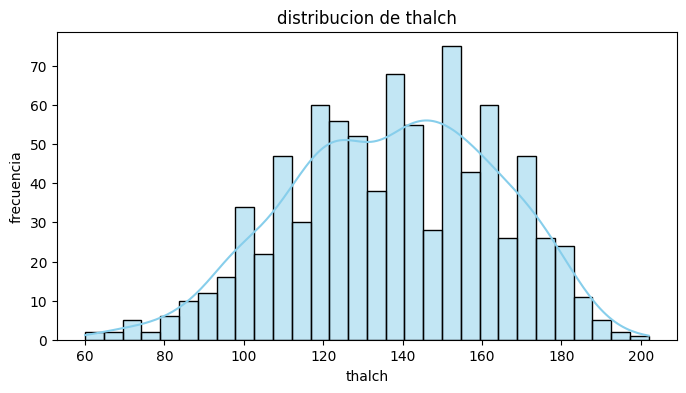

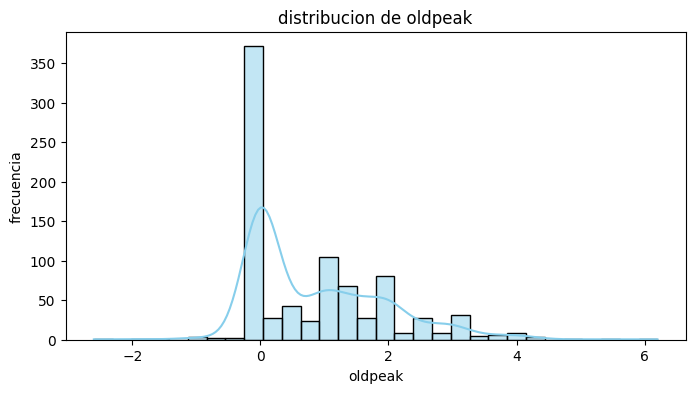

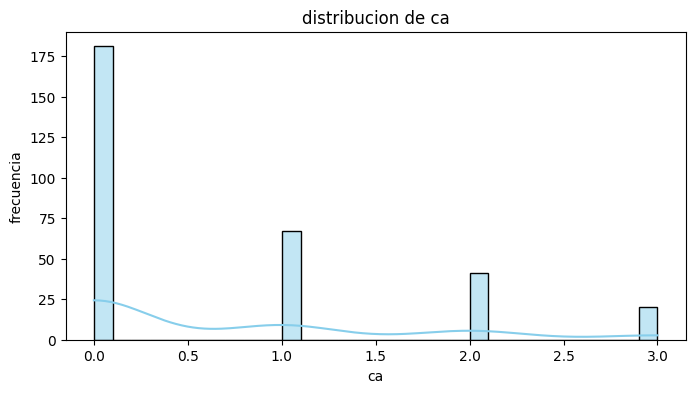

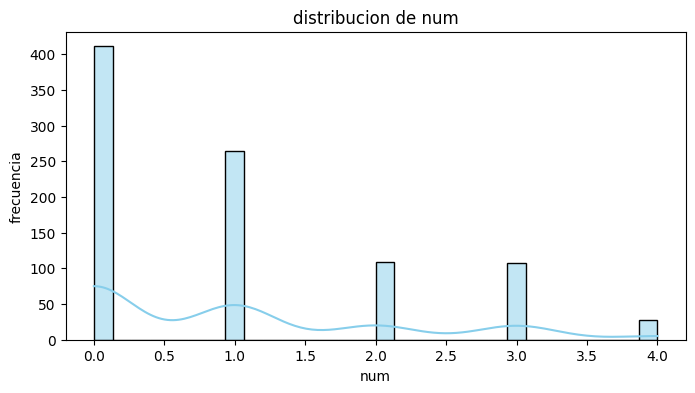

In [11]:
# ahora podemos crear algunos histogramas para las variables numericas

# lo importante aqui es que solo se muestren datos que valgna la oena, por tanto ID no se considera
for column in df_numeros.columns.drop('id'):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'distribucion de {column}')
    plt.xlabel(column)
    plt.ylabel('frecuencia')
    plt.show()


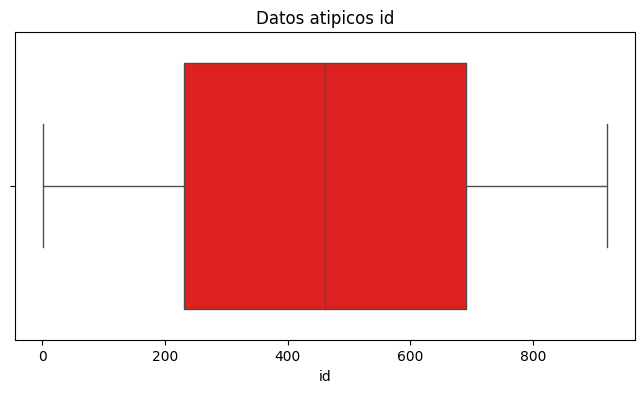

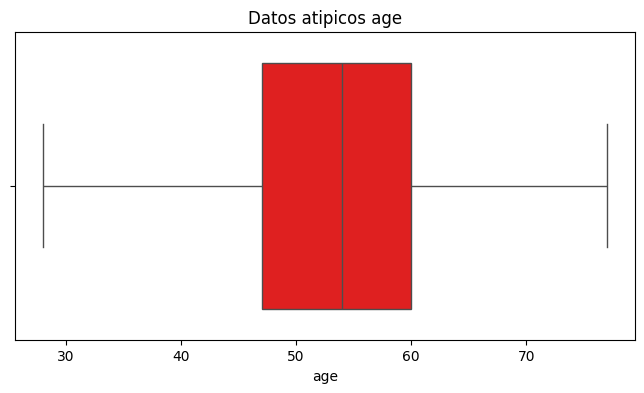

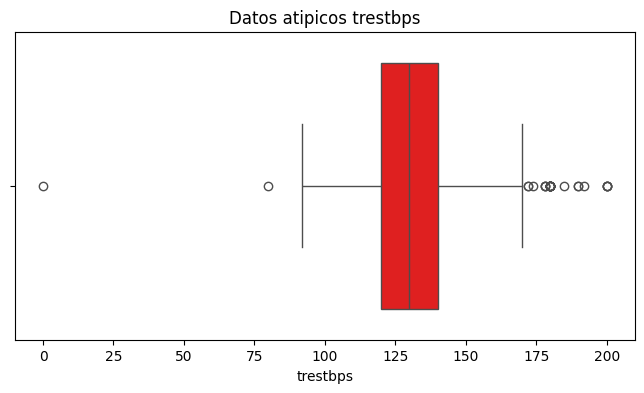

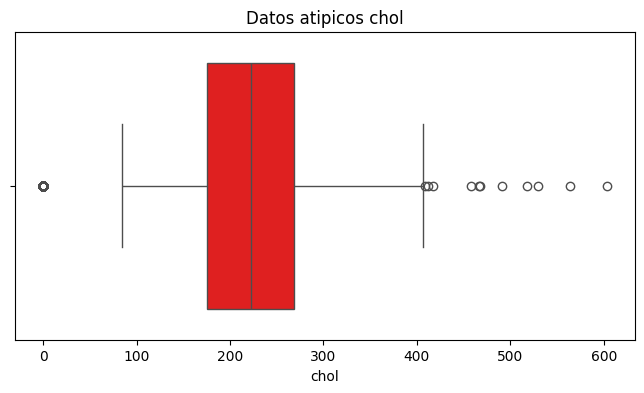

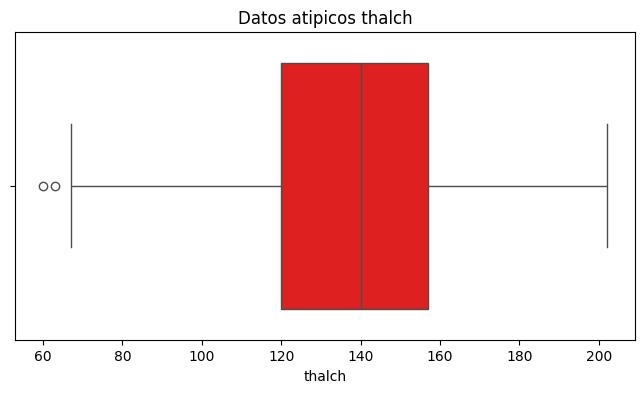

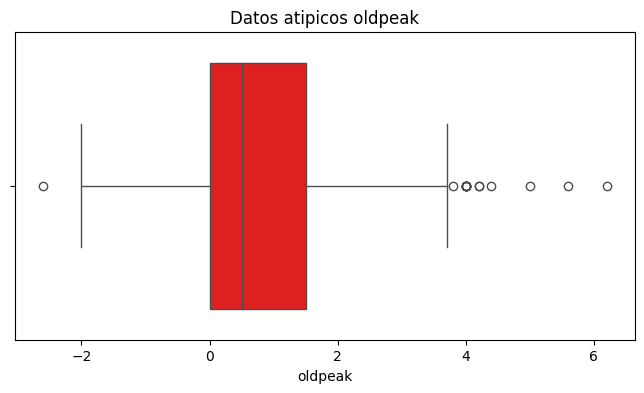

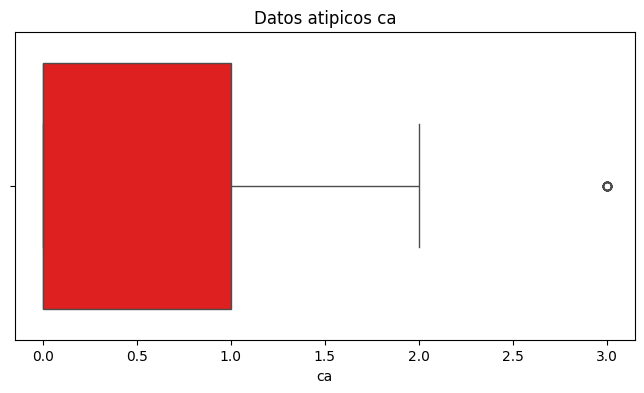

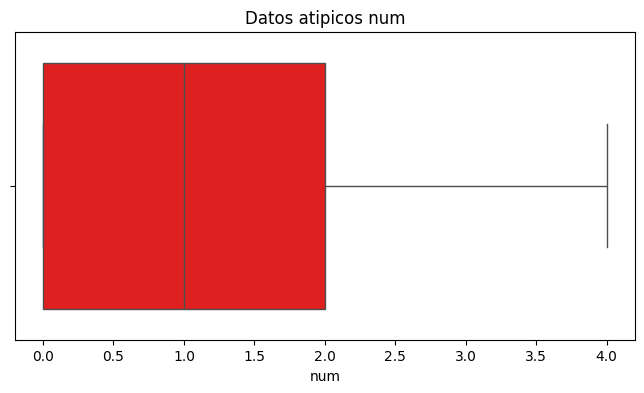

In [12]:
for columna in df_numeros:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_numeros[columna], color='red')
    plt.title(f'Datos atipicos {columna}')
    plt.xlabel(columna)
    plt.show()

Evidentemente se muestran datos **anómalos** ya que este grafico de caja muestra los cuartiles y los valores atipicos fuera de los *bigotes* 

In [13]:
# ahora comprobaremos si existen algunos datos faltantes por cada una de las columnas

faltantes = df.isnull().sum()
print(faltantes[faltantes > 0]) 


trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


En esta segunda parte podemos observar lo siguiente:
- el resumen estadistico para cada una de las variables
- existen variables categoricas que son perfectas para ser mostradas en un grafico de pastel o dona
- en los datos numericos podemos mostrarlos de igual forma pero detecte que en el caso del campo **ID** no hace falta ya que podemos simplemente omitirlo
- el df tiene varios datos **atipicos** ademas de datos **faltantes**

# Realiza un procesamiento o limpieza a los datos

In [14]:
# Condiciones para valores incorrectos o fuera de rango EN BASE al txt y las visualizaciones que se observaron previamente
condicion_incorrecta = (
    (df['age'] < 0) | (df['age'] > 120) |
    (~df['sex'].isin(['Male', 'Female'])) |
    (~df['cp'].isin(['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic'])) |
    (df['trestbps'] < 50) | (df['trestbps'] > 250) |
    (df['chol'] < 100) | (df['chol'] > 600) |
    (~df['fbs'].isin([True, False])) |
    (~df['restecg'].isin(['normal', 'stt abnormality', 'lv hypertrophy'])) |
    (df['thalch'] < 60) | (df['thalch'] > 220) |
    (~df['exang'].isin([True, False])) |
    (df['oldpeak'] < 0) |
    (~df['slope'].isin(['upsloping', 'flat', 'downsloping'])) |
    (df['ca'] < 0) | (df['ca'] > 3) |
    (~df['thal'].isin(['normal', 'fixed defect', 'reversible defect']))
)

# se crea el df donde sean eliminandas las filas con valores faltantes e incorrectos
df_drop = df.dropna().loc[~condicion_incorrecta]

In [15]:
# vamos a inputar los nuevos valores
df_fill = df.copy()

# imputar solo para variables num
variables_num = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# imputar los valores faltantes y incorrectos con la mediana
for column in variables_num:
    df_fill[column].fillna(df_fill[column].median(), inplace=True)

# imputar solo para variables num con la moda
variables_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# imputar los valores faltantes y incorrectos con la moda
for column in variables_cat:
    df_fill[column].fillna(df_fill[column].mode()[0], inplace=True)


# Realiza	una	narrativa	de	los	datos

In [16]:
# Estadísticas descriptivas de la edad
edad_promedio = df['age'].mean()
edad_minima = df['age'].min()
edad_maxima = df['age'].max()

# Estadísticas descriptivas por género
edad_por_genero = df.groupby('sex')['age'].describe()

# Imprimir la narrativa
print(f"La edad promedio de los pacientes es de {edad_promedio:.2f} años, con una edad mínima de {edad_minima} años y una edad máxima de {edad_maxima} años.")
print("\nEstadísticas de edad por género:")
print(edad_por_genero)


La edad promedio de los pacientes es de 53.51 años, con una edad mínima de 28 años y una edad máxima de 77 años.

Estadísticas de edad por género:
        count       mean       std   min   25%   50%   75%   max
sex                                                             
Female  194.0  52.474227  9.496214  30.0  46.0  53.0  60.0  76.0
Male    726.0  53.787879  9.392685  28.0  47.0  55.0  60.0  77.0


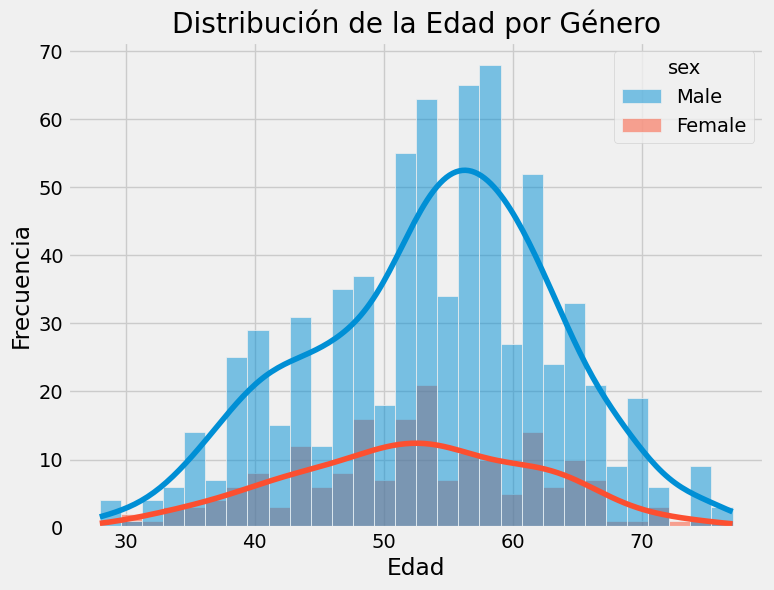

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='sex', kde=True, bins=30)
plt.title('Distribución de la Edad por Género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


De la un población de ciertos encuestados, donde los involucrados son **mayores a 27 años**
Se puede detectar que los **hombres** tienden a presentar mas dolores de cualquier tipo a diferencia de las mujeres.

Y los hombres tienen una tendencia a no presentar sintomas, lo que se podria traducri como que la poblacion masculina es mas *sana*.


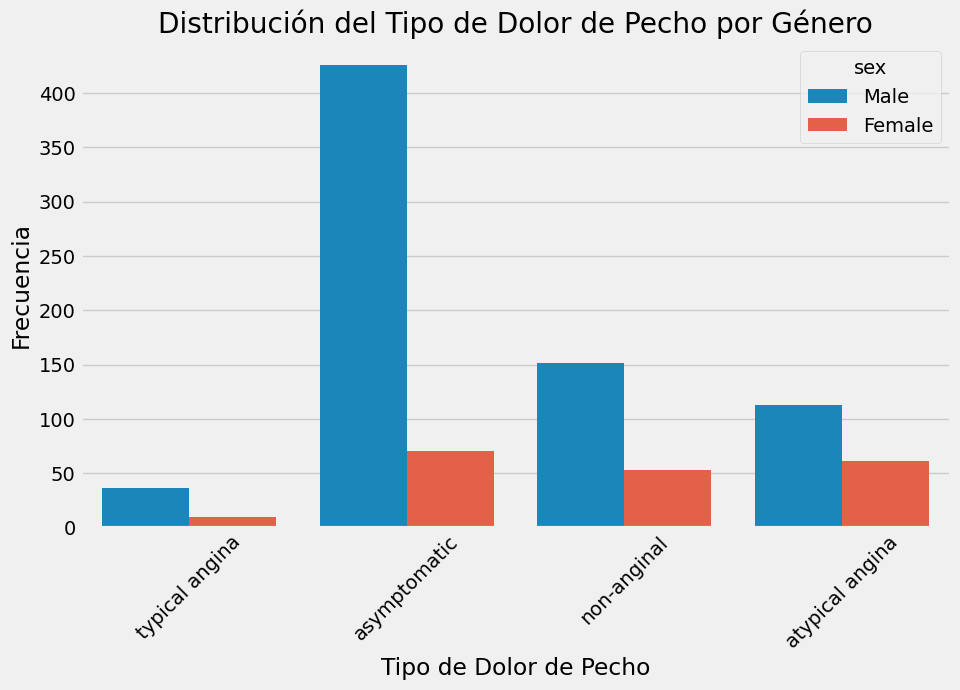

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', hue='sex')
plt.title('Distribución del Tipo de Dolor de Pecho por Género')
plt.xlabel('Tipo de Dolor de Pecho')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


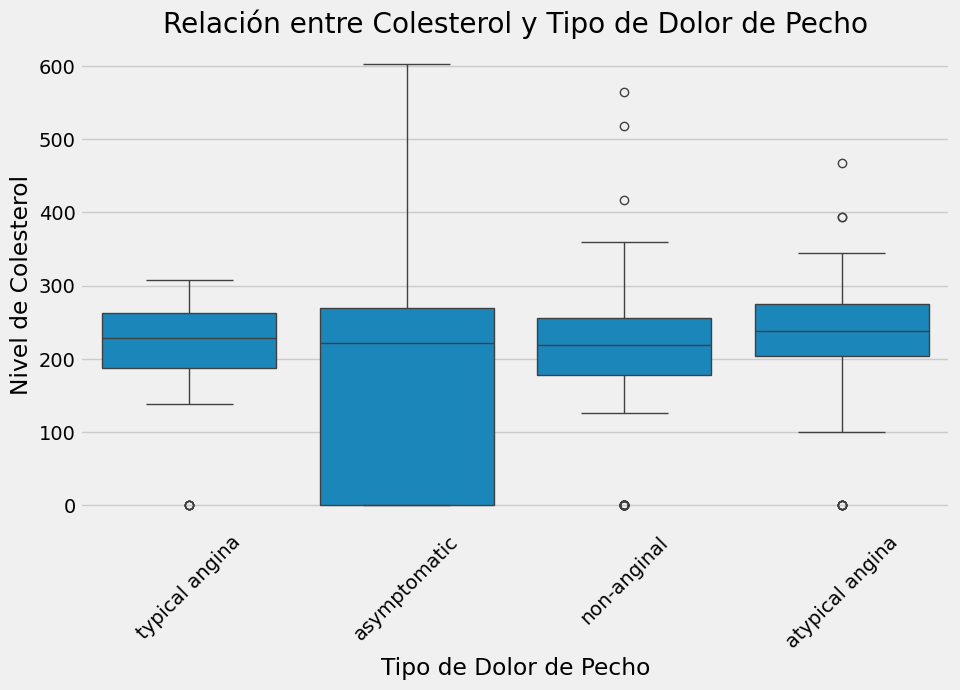

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cp', y='chol')
plt.title('Relación entre Colesterol y Tipo de Dolor de Pecho')
plt.xlabel('Tipo de Dolor de Pecho')
plt.ylabel('Nivel de Colesterol')
plt.xticks(rotation=45)
plt.show()


En esta grafica y comparando en otra funete confiable, podemos asegurar que las personas asintomáticas, tienen el colesterol menor a 280 que se considera *normal*

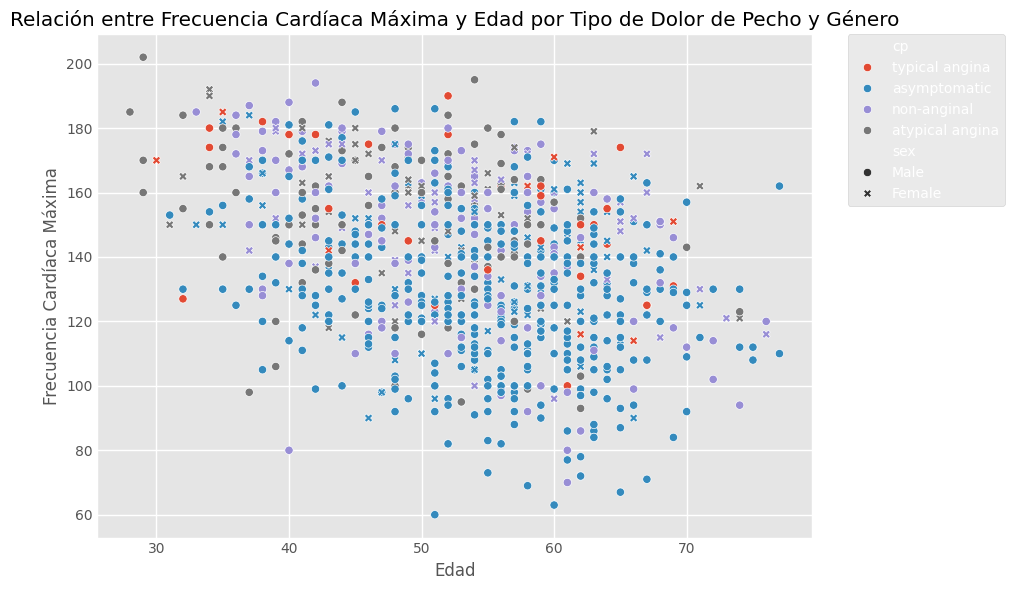

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalch', hue='cp', style='sex')


# Ajuste de la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Título y etiquetas
plt.title('relacion entre frecuencia cardíaca maxima y edad por tipo de dolor de pecho y genero', color="black")
plt.xlabel('Edad')
plt.ylabel('frecuencia cardiaca maxima')
plt.tight_layout()
plt.show()



Aqui es donde se muestra que tan relacionado esta la freceuncia cardaica con la edad y la posible deteccion de una enfermedad
la primera de la que nos podemos dar cuenta es que las personas menores a 60 años padecen de una "angina típica" en una parte de la muestra y siempre y cuando su presion este por arriba de los 100 u


C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_21976\1989851783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='thal', y='chol', palette='Set2')


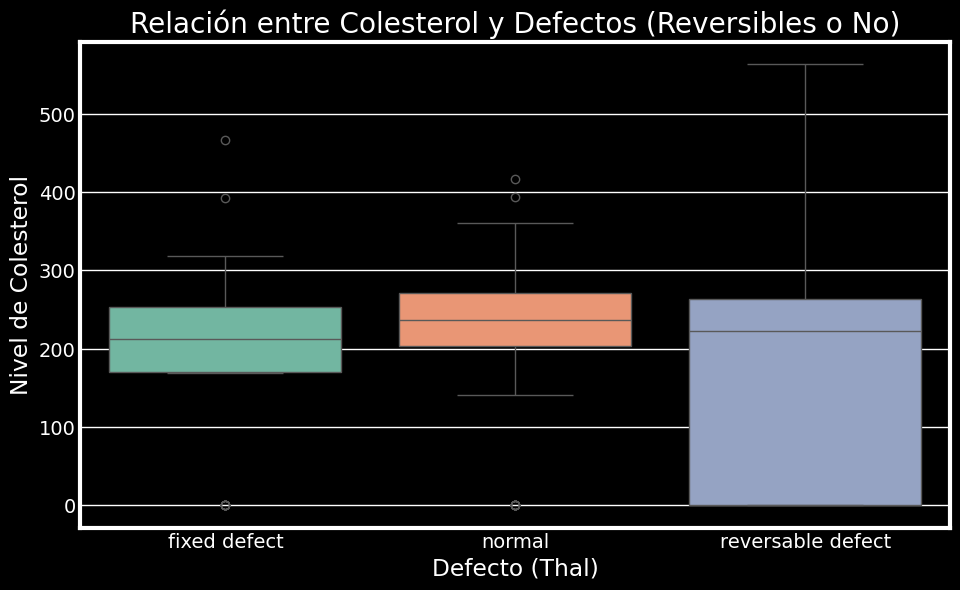

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='thal', y='chol', palette='Set2')
plt.title('Relación entre Colesterol y Defectos (Reversibles o No)')
plt.xlabel('Defecto (Thal)')
plt.ylabel('Nivel de Colesterol')   
plt.show()


los que ya tiene defectos arreglados tienen un rango de colesterol *normal* a comparación con los otros grupos.
los que tienen un defecto Fijo presentan un mayor nivel de colesterol 
los que tienen irreversibles estan altamente ligados con un colesterol elevado.


Y como conclusiones finales, podriamos decir que la mayor parte de la poblacion dolores, por consucuente tiene alguna complicacion con el colesterol ademas de que son la mayoria de persnas hombres